# STC Jawwy

In [3]:
"""
Here we install libraries that are not installed by default 
Example:  pyslsb
Feel free to add any library you are planning to use.
"""
!pip install pyxlsb

In [2]:
# Import the required libraries 
"""
Please feel free to import any required libraries as per your needs
"""
import pandas as pd     # provides high-performance, easy to use structures and data analysis tools
import pyxlsb           # Excel extention to read xlsb files (the input file)
import numpy as np      # provides fast mathematical computation on arrays and matrices

# Jawwy dataset
The dataset consists of meta details about the movies and tv shows as genre. 
Also details about Users activities, spent duration and if watching in High definition or standard definition. 
You have to analyse this dataset to find top insights, findings and to solve the four tasks assigned to you.

In [9]:
dataframe = pd.read_excel("stc TV Data Set_T1.xlsb",sheet_name="Final_Dataset")
# Please make a copy of dataset if you are going to work directly and make changes on the dataset
# you can use   df=dataframe.copy()
df=dataframe.copy()

In [10]:
# check the data shape
df.shape

(1048575, 13)

In [11]:
# display the first 5 rows 
df.head()

,Column1,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,1,42882,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,3,42876,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,4,42957,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,5,42942,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,7,42923,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [12]:
# Data Preprocessing on the input data
df = df.drop(columns=['Column1'])         # dropping the index column
df['program_name'] = df['program_name'].str.strip()  # trim spaces in movies names to avoid misspellings in input data
df['date_'] = pd.to_datetime(df['date_'], unit='D', origin='30/12/1899')  # read date column as date data type
df[['duration_seconds', 'season','episode','series_title','hd']] = df[['duration_seconds', 'season','episode','series_title','hd']].apply(pd.to_numeric)  # read numeric columns as numeric data types
df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']] = df[['user_id_maped', 'program_name','program_class','program_desc','program_genre','original_name']].astype(str) # read string columns as string data types

In [13]:
# display the dataset after applying data types
df.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


In [16]:
# describe the numeric values in the dataset
df.describe()

,date_,duration_seconds,season,episode,series_title,hd
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2017-10-04 00:23:20.346183936,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
min,2017-03-14 00:00:00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2017-06-10 00:00:00,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2017-10-14 00:00:00,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2018-01-21 00:00:00,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,2018-04-30 00:00:00,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00
std,NaN,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01


In [17]:
# check if any column has null value in the dataset
df.isnull().any()


date_               False
user_id_maped       False
program_name        False
duration_seconds    False
program_class       False
season              False
episode             False
program_desc        False
program_genre       False
series_title        False
hd                  False
original_name       False
dtype: bool

In [21]:
# Replace null values to "None" in program_desc column
if df.isnull().any().any():
    replacements = {"program_desc": "None"}
    df.fillna(replacements, inplace=True)

# Task 1
##### You are required to work on task one to study and HD flag for available dataset

In [18]:
# make a copy of the dataframe for working on task 1
df=df.copy()

In [19]:
# Here we try to get the most watched movies (Total Views / Total Users Views / Total watch time)
# For series we concatenated the Session episode to differentiate between episodes 
grouped=df.copy()
grouped.loc[grouped['program_class'] == 'SERIES/EPISODES', 'program_name'] = grouped['program_name']+'_SE'+grouped['season'].astype(str)+'_EP'+grouped['episode'].astype(str)
grouped = grouped.groupby(['program_name','program_class'])\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_name','program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [20]:
# show the result
grouped.head(35)

,program_name,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,The Boss Baby,MOVIE,3389,24047,2961.350833
1,The Amazing pider-Man,MOVIE,1011,2877,1966.119167
2,The Expendables,MOVIE,853,2119,1961.159444
3,Moana,MOVIE,2173,8081,1706.176944
4,Trolls,MOVIE,2613,13793,1601.023056
5,Bean,MOVIE,949,3617,1423.955000
6,The murfs,MOVIE,867,3132,1342.141111
7,Hotel Transylvania,MOVIE,491,1947,1096.533611
8,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
9,The Man With The Iron Fists,MOVIE,707,2505,859.626389


In [21]:
# we import Visualization libraries 
# you can ignore and use any other graphing libraries 
import matplotlib.pyplot as plt # a comprehensive library for creating static, animated, and interactive visualizations
import plotly #a graphing library makes interactive, publication-quality graphs. Examples of how to make line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [22]:
# plot top 10 Programs 
fig = px.pie(grouped.head(10), values='Total watch time in houres', names='program_name',\
             hover_data=['program_class'],title='top 10 programs in total watch time in houres')
fig.show()

In [26]:
# Here we try to study the customer experience against Program class
grouped=df.copy()
grouped = grouped.groupby('program_class')\
.agg({'user_id_maped': [('co1', 'nunique'),('co2', 'count')],\
      'duration_seconds': [('co3', 'sum')] }).reset_index()
grouped.columns = ['program_class','No of Users who Watched', 'No of watches', 'Total watch time in seconds']
grouped['Total watch time in houres']=grouped['Total watch time in seconds']/3600
grouped = grouped.drop(columns=['Total watch time in seconds'])
grouped = grouped.sort_values(by=['Total watch time in houres', 'No of watches','No of Users who Watched'], ascending=False).reset_index(drop=True)


In [27]:
# show the result
grouped.head()

,program_class,No of Users who Watched,No of watches,Total watch time in houres
0,SERIES/EPISODES,3901,560174,255097.787500
1,MOVIE,11355,488401,103444.145556


In [28]:
# plot the total watch time against total number of users and report your findings
fig = px.pie(grouped, values='Total watch time in houres', names='program_class',\
             hover_data=['program_class'],title='Total duration spent by program_class')
fig2 = px.pie(grouped, values='No of Users who Watched', names='program_class',\
             hover_data=['program_class'],title='Total Users watching by program_class')

fig.update_traces(sort=False)
fig2.update_traces(sort=False)
fig.show()
fig2.show()

relation and user's behaviour Against HD flag

In [30]:
"""
TODO study the relation and user's behaviour Against HD flag, feel free to include any comparison 
"""
grouped = df.groupby('hd')\
    .agg({'user_id_maped': [('co1', 'nunique'), ('co2', 'count')], \
          'duration_seconds': [('co3', 'sum')]})\
    .reset_index()

grouped.columns = ['hd', 'No of Users who Watched', 'No of watches', 'Total watch time in seconds']

grouped['Avg watches per user'] = grouped['No of watches'] / grouped['No of Users who Watched']
grouped['Avg watch time per user (hours)'] = grouped['Total watch time in seconds'] / 3600 / grouped['No of Users who Watched']
grouped['Avg watch time per watch (minutes)'] = grouped['Total watch time in seconds'] / 60 / grouped['No of watches']


grouped

,hd,No of Users who Watched,No of watches,Total watch time in seconds,Avg watches per user,Avg watch time per user (hours),Avg watch time per watch (minutes)
0,0,6728,643539,966111742,95.650862,39.887689,25.020803
1,1,11000,405036,324639217,36.821455,8.197960,13.358451


Relationship between HD flag and Total Watch Time

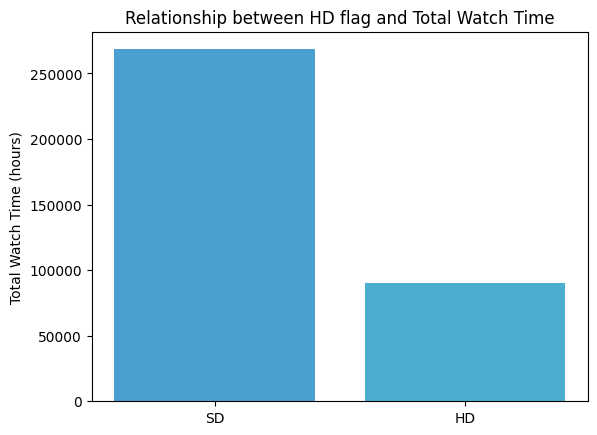

In [47]:
# create a new dataframe for HD flag analysis
hd_grouped = df.groupby('hd').agg({'duration_seconds': 'sum'}).reset_index()
hd_grouped['total_watch_time_hours'] = hd_grouped['duration_seconds'] / 3600

# Set the color scheme for the bars and legend
colors = ['#0077be', '#008cba']

# create the bar chart
x_labels = ['SD', 'HD']
x_pos = np.arange(len(x_labels))
bar_heights = hd_grouped['total_watch_time_hours']
error = [0, 0] # no error for this example
plt.bar(x_pos, bar_heights, yerr=error, align='center', alpha=0.7, color=colors)
plt.xticks(x_pos, x_labels)
plt.ylabel('Total Watch Time (hours)')
plt.title('Relationship between HD flag and Total Watch Time')
plt.show()

Number of Watches by HD Flag

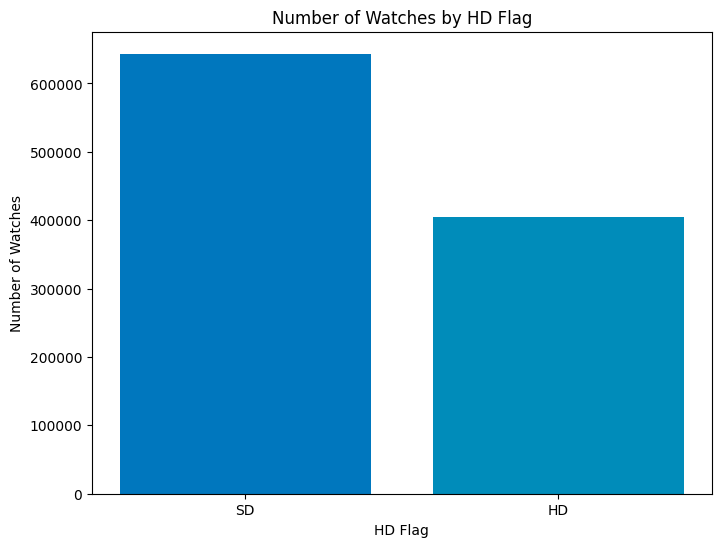

In [42]:

fig, ax = plt.subplots(figsize=(8, 6))

# Set the color scheme for the bars and legend
colors = ['#0077be', '#008cba']

# Create a bar chart showing the number of watches for each HD flag value
hd_watches = df.groupby('hd')['user_id_maped'].count().reset_index()
ax.bar(hd_watches['hd'], hd_watches['user_id_maped'], color=colors)

# Set the title and axis labels
ax.set_title('Number of Watches by HD Flag')
ax.set_xlabel('HD Flag')
ax.set_ylabel('Number of Watches')

# Set the x-axis ticks and tick labels
ax.set_xticks(hd_watches['hd'])
ax.set_xticklabels(['SD', 'HD'])

# Display the plot
plt.show()

Number of Users Who Watched by HD Flag

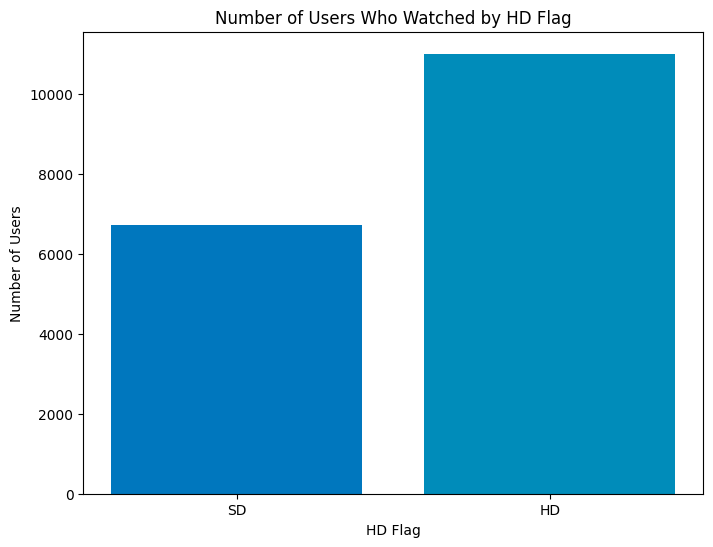

In [49]:
fig, ax = plt.subplots(figsize=(8, 6))

# Set the color scheme for the bars and legend
colors = ['#0077be', '#008cba']

# Create a bar chart showing the number of users who watched for each HD flag value
hd_users = df.groupby('hd')['user_id_maped'].nunique().reset_index()
ax.bar(hd_users['hd'], hd_users['user_id_maped'], color=colors)

# Set the title and axis labels
ax.set_title('Number of Users Who Watched by HD Flag')
ax.set_xlabel('HD Flag')
ax.set_ylabel('Number of Users')

# Set the x-axis ticks and tick labels
ax.set_xticks(hd_users['hd'])
ax.set_xticklabels(['SD', 'HD'])

# Display the plot
plt.show()

The results show that HD have more users using it, but SD users have much bigger watch time.